In [1]:
import matplotlib.pyplot as plt
def create_plots(X, Y, Z, Z1, cm='viridis'):
    '''
    This function is given in order to help you visualize your results more quickly
    Plots Z(x,y) and Z1(x,y). Colors are based on the range and colormap given as inputs
    '''
    fig = plt.figure(figsize=(10,5), dpi=150)

    ax1 = fig.add_subplot(2,1,1)
    #ax1.set_aspect('equal')
    #ax1.xaxis.tick_top()
    #ax1.xaxis.set_label_position('top') 
    #ax1.invert_yaxis()
    levels = np.linspace(0,40,15)
    #ticks = np.linspace(colorrange[0],colorrange[1],11)
    cntr = ax1.contourf(X, Y, Z, levels, cmap=cm)
    ax1.contour(X, Y, Z, levels, colors='w')
    ax1.set_xlabel('x')                                     
    ax1.set_ylabel('y')
    #ax1.set_title('Stream function')
    cbar = fig.colorbar(cntr)
    #cbar.set_ticks(ticks)
    cbar.set_label('Stream function')
                                  
    ax2 = fig.add_subplot(2,1,2)  
    cntr = ax2.contourf(X, Y, Z1, cmap=cm)
    ax2.set_xlabel('x')                                     
    ax2.set_ylabel('y')
    #ax1.set_title('vorticity')
    cbar = fig.colorbar(cntr)
    #cbar.set_ticks(ticks)
    cbar.set_label('vorticity')

    return [ax1, ax2] 

c:\users\hayoo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in double_scalars
c:\users\hayoo\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
c:\users\hayoo\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
c:\users\hayoo\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\contour.py:1200: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
c:\users\hayoo\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\contour.py:1200: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
c:\users\hayoo\appda

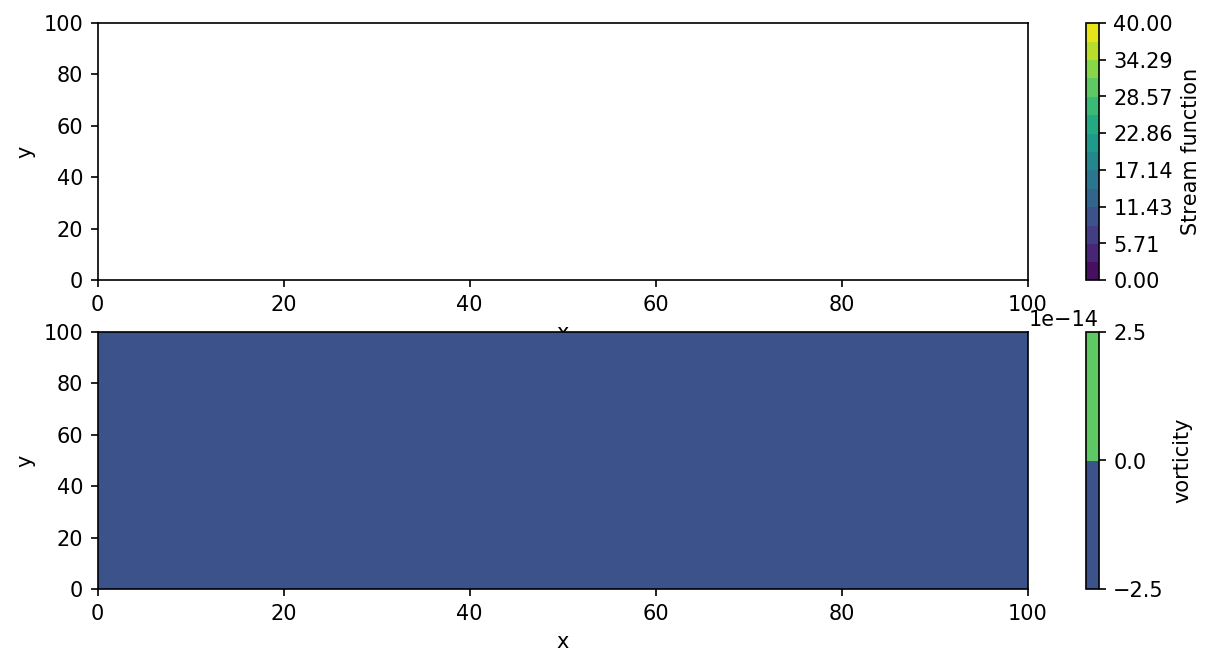

In [5]:
import numpy as np                                  

def solve_top_flow(Nxmax=100, Nymax=100, lx = 1, ly = 1, nu=1., h=1, max_t = 10):
    def boundary_condition():  
        u[0,:]  = 0
        u[-1,:] = 0
        u[:,0]  = 0
        u[:,-1] = 0  

        return 

    def relax(): 
        ''' Update the stream function and vorticity '''
        up = np.roll(u.copy(), 1, axis=0)
        down = np.roll(u.copy(), -1, axis=0)
        left = np.roll(u.copy(), 1, axis=1)
        right = np.roll(u.copy(), -1, axis=1)
        
        w = (up+down+left+right-4*u)/h**2 
        
#         # Stream function relaxation                                                                                                 
#         for  i in range(1, Nxmax):
#             for  j in range (1, Nymax):
#                 #complete this part
#                 u[i,j] = (u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1] + w[i,j]*h**2)/4
#         # Vorticity relaxation
#         for  i in range(1, Nxmax):  
#             for j in range(1,Nymax):
#                 #complete this part
#                 a1 = w[i+1,j]+w[i-1,j]+w[i,j+1]+w[i,j-1]
#                 a2 = (u[i,j+1]-u[i,j-1])*(w[i+1,j]-w[i-1,j])
#                 a3 = (u[i+1,j]-u[i-1,j])*(w[i,j+1]-w[i,j-1])

#                 w[i,j] = (a1-(R/4.)*(a2-a3))/4.0
                
        # Update boundary conditions based on current values  
        boundary_condition()      

        return

    
    # Reynold number, normal units
    R = 100#V0*h/nu 

    # Initialize the Stream and Vorticity functions
    u = np.zeros((Nxmax+1,Nymax+1)) # Stream function
    w = np.zeros((Nxmax+1,Nymax+1)) # Vorticity

    # Time to solve the equations!
    iteration = 0                                                 #complete this part
    omega = 0.1
    
    vorticities = []
    stream_functions = []
    
    for t in range(max_t):
        u_old = u.copy()
        while True:
            relax()
            if np.sqrt(np.sum(u_old**2, u**2)) < 0.01:
                break
            u_old = u.copy()
        vorticities.append(w)
        stream_functions.append(u)

    # Put stream function in V0h units
    
    for  i in range (0, Nxmax+1):   
        for  j in range(0,Nymax+1 ):   
            u[i,j] = u[i,j]/(V0*h)
    # Properly write out the results for plotting
    x = np.arange(Nxmax+1); y = np.arange(Nymax+1)
    X, Y = np.meshgrid(x,y)
    U = u[X,Y]
    W = w[X,Y]

    return X, Y, U, W


X, Y, U, W = solve_top_flow(maxits=1000)
create_plots(X, Y, U, W)
          